# Task 2: Entanglement Witness

This notebook tests whether two qubits remain entangled after a probabilistic error:

1. Prepare the Bell state (|00⟩ + |11⟩)/√2.
2. Introduce a 20% chance of applying an X gate to one qubit.
3. Measure only one qubit 1000 times and check if the results are random (50/50).
4. If not random, entanglement is broken.

We’ll use:
- **H Gate**: For superposition.
- **CX Gate**: To entangle qubits.
- **X Gate**: As the error gate.
- **Randomness**: To simulate the 20% probability.

In [1]:
# Import necessary libraries
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np  # For random number generation

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 1: Initialize the Quantum Circuit

Create a circuit with:
- 2 qubits.
- 1 classical bit (since we’re only measuring one qubit).

Both qubits start in |0⟩.

In [2]:
# Create a circuit with 2 qubits and 1 classical bit
qc = QuantumCircuit(2, 1)
print("Circuit created with 2 qubits and 1 classical bit.")

Circuit created with 2 qubits and 1 classical bit.


## Step 2: Prepare the Bell State

To create (|00⟩ + |11⟩)/√2:
- Apply an **H gate** to Qubit 0 (superposition: |0⟩ → |+⟩).
- Apply a **CX gate** with Qubit 0 as control and Qubit 1 as target.

This entangles the qubits so they’re either both 0 or both 1.

In [3]:
# Prepare the Bell state
qc.h(0)  # H gate on Qubit 0
qc.cx(0, 1)  # CX gate to entangle Qubit 0 and Qubit 1
print("Bell state (|00⟩ + |11⟩)/√2 prepared.")

Bell state (|00⟩ + |11⟩)/√2 prepared.


## Step 3: Add Probabilistic Error

With a 20% chance, apply an **X gate** to Qubit 1:
- Use `np.random.random()` to generate a number between 0 and 1.
- If it’s < 0.2, apply the X gate (flips Qubit 1).

This might break the entanglement by making Qubit 1 independent.

In [10]:
# Add probabilistic X gate to Qubit 1
if np.random.random() < 0.2:  # 20% chance
    qc.x(1)
    print("X gate applied to Qubit 1 (error occurred).")
else:
    print("No X gate applied (no error).")

X gate applied to Qubit 1 (error occurred).


## Step 4: Measure One Qubit

Measure only Qubit 0 into the classical bit:
- If still entangled, Qubit 0’s outcome should be random (50/50).
- If entanglement is broken, the outcome might be biased.

In [15]:
# Measure Qubit 0
qc.measure(0, 0)  # Qubit 0 into classical bit 0
print("Measurement added for Qubit 0.")

Measurement added for Qubit 0.


## Step 5: Visualize the Circuit

Display the circuit to confirm its structure:
- Includes H, CX, possible X, and measurement.

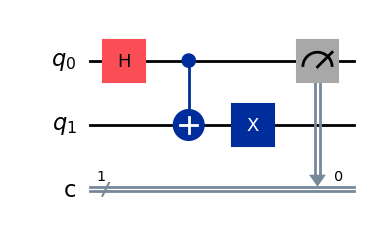

In [12]:
# Display the circuit diagram
circuit_diagram = qc.draw(output='mpl')
display(circuit_diagram)

## Step 6: Simulate the Circuit

Run the circuit 1000 times with **AerSimulator**:
- Count outcomes of Qubit 0 (0 or 1).
- Check if they’re ~50/50 (entangled) or biased (not entangled).

In [17]:
# Simulate the circuit with 1000 shots
simulator = AerSimulator()
job = simulator.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()
print("Simulation completed. Counts:", counts)

Simulation completed. Counts: {'1': 483, '0': 517}


## Step 7: Visualize and Analyze Results

Plot the histogram of Qubit 0’s measurements:
- **Entangled (no X)**: 500 '0' and 500 '1' (random).
- **Not Entangled (X applied)**: Biased toward '0' or '1', depending on Qubit 1’s state after X.

This shows entanglement breaking when one qubit is modified.

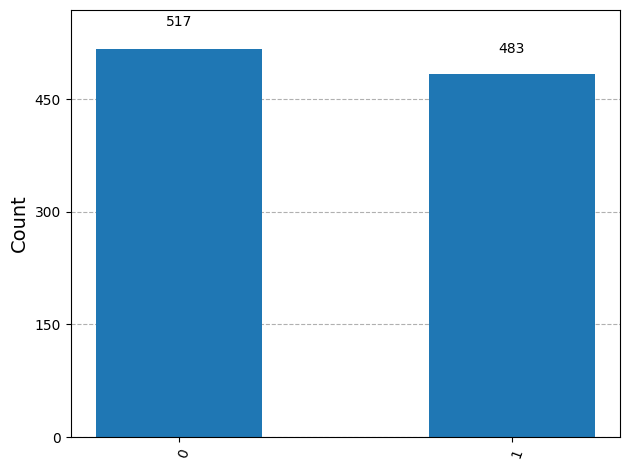

In [18]:
# Plot and display the histogram
fig = plot_histogram(counts)
display(fig)